In [249]:
import numpy as np
# %matplotlib inline
import matplotlib
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

plt.style.use('default')

In [266]:
class LatexFigure():
    def __init__(
        self,
        width = 'thesis',
        fraction = 1, 
        use_gridspec = False, 
        gridspec_layout = (1,1),
        font_scale=1,
        font_specifics={},
        gridspec_params = {},
        plot_style = 'default' 
    ):
        plt.style.use(plot_style)
        # style from https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html
        
        if width == 'thesis':
            self.width_pt = 448
        elif width == 'beamer':
            self.width_pt = 307.28987
        else:
            self.width_pt = width
        self.fraction = fraction
        self.font_scale = font_scale
        # Setup gridspec 
        self.use_gridspec = use_gridspec
        self.gridspec_layout = gridspec_layout
        
        # Setup figure
        self.size = self.set_size(
            width_pt = self.width_pt, 
            fraction = self.fraction,
            subplots = self.gridspec_layout
        )
        self.set_fonts(font_specifics=font_specifics)
        
        if self.use_gridspec: 
            self.num_rows = self.gridspec_layout[0]
            self.num_cols = self.gridspec_layout[1]
            self.gridspec_axes = {}
            # TODO pass in wspace and other GS params
            self.fig = plt.figure(
                figsize=self.size
            )

            self.gs = GridSpec(
                nrows=self.num_rows,
                ncols=self.num_cols,
                figure=self.fig, 
                **gridspec_params
            )
            self.row = 0
            self.col = 0            
        else:
            self.fig, self.ax = plt.subplots(1, 1, figsize=self.size)
                        
    def set_fonts(
        self, 
        font_specifics = {}
    ):
        self.font_default = int(11*self.font_scale)
        self.font_small = int(8*self.font_scale)
        self.font_medium = int(10*self.font_scale)
        self.font_large = int(14*self.font_scale)
        
        self.tex_fonts = {
            # Use LaTeX to write all text
            "pgf.texsystem": "pdflatex",
            "text.usetex": True,
            "font.family": "serif",
            'pgf.rcfonts': False,

            # Use 10pt font in plots, to match 10pt font in document
            "font.size": self.font_default,
            "axes.titlesize": self.font_medium,
            "axes.labelsize": self.font_medium,
            # Make the legend/label fonts a little smaller
            "legend.fontsize": self.font_small,
            "xtick.labelsize": self.font_medium,
            "ytick.labelsize": self.font_medium,
            # Legend
            "legend.fontsize" : self.font_medium, 
            "figure.titlesize" : self.font_large,
            
            # Format of figure
            "savefig.format" : 'pdf'
        }
        self.tex_fonts.update(font_specifics)

        # update fonts etc via matplotlib
        font = {'family' : 'serif',
                'weight' : 'normal',
        }
        plt.rc('font', **font)
    
        plt.rcParams.update(self.tex_fonts)        
        
    def set_size(self, width_pt, fraction=1, subplots=(1, 1)):
        """Set figure dimensions to avoid scaling in LaTeX.

        Parameters
        ----------
        width_pt: float
                Document width in points, or string of predined document type
        fraction: float, optional
                Fraction of the width which you wish the figure to occupy
        subplots: array-like, optional
                The number of rows and columns of subplots.
        Returns
        -------
        fig_dim: tuple
                Dimensions of figure in inches
        """
        print("Getting size given subplots=", subplots)
        # Width of figure (in pts)
        fig_width_pt = width_pt * fraction
        # Convert from pt to inches
        inches_per_pt = 1 / 72.27

        # Golden ratio to set aesthetic figure height
        # https://disq.us/p/2940ij3
        golden_ratio = (5**.5 - 1) / 2

        # Figure width in inches
        fig_width_in = fig_width_pt * inches_per_pt
        # Figure height in inches
        fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

        return (fig_width_in, fig_height_in)

    def new_axis(self, ax_params={}):
        if self.use_gridspec:
            self.ax = self.fig.add_subplot(
                self.gs[self.row, self.col],
                **ax_params
            )
            self.gridspec_axes[(self.row, self.col)] = self.ax

            self.col += 1
            if self.col == self.num_cols:
                self.col = 0
                self.row += 1
        
        # set background to white # TODO make this optional
        self.ax.set_facecolor('white')
        return self.ax 
    
    def show(self):
        # via IPython.display
        display(self.fig)
        
    def save(self, save_to_file, filetype='pdf'):
        self.fig.savefig(save_to_file, bbox_inches='tight')
        

Getting size given subplots= (3, 2)


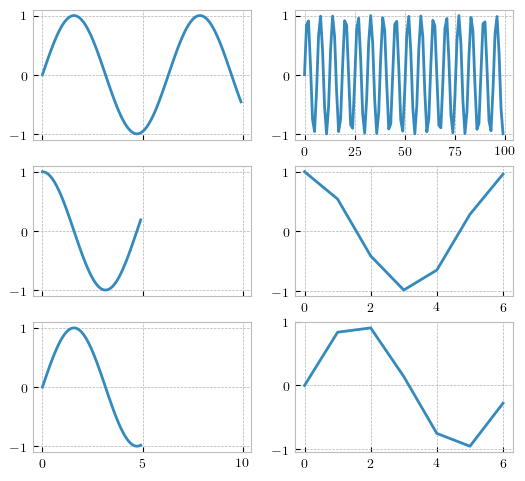

In [267]:
lf = LatexFigure(
    use_gridspec=True, 
    gridspec_layout=(3, 2),
    gridspec_params = {
#         'hspace' : 1,
#         'wspace' : 2
    },
    font_scale=1.,
    plot_style='bmh'
)

ax1 = lf.new_axis()
ax2 = lf.new_axis()
ax3 = lf.new_axis(ax_params={'sharex' : ax1})
ax4 = lf.new_axis()
ax5 = lf.new_axis(ax_params={'sharex' : ax3})
ax6 = lf.new_axis(ax_params={'sharex' : ax4})


x1 = np.arange(0, 10, 0.1)
x2 = np.arange(0, 100, 1)
ax1.plot(x1, np.sin(x1))
ax2.plot(x2, np.sin(x2))

x3 = np.arange(0, 5, 0.1)
x4 = np.arange(0, 7, 1)
ax5.plot(x3, np.sin(x3), )
ax6.plot(x4, np.sin(x4))

ax3.plot(x3, np.cos(x3), )
ax4.plot(x4, np.cos(x4))

# ax1.set_xticks([])
# ax2.set_xticks([])
# ax3.set_xticks([])
# ax4.set_xticks([])
ax5.set_xticks([0,5,10])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)


lf.save('test_gs_3x2')


Getting size given subplots= (2, 3)


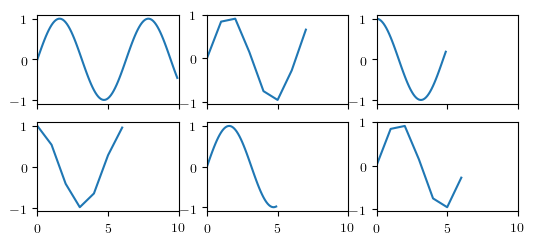

In [262]:
lf = LatexFigure(
    use_gridspec=True, 
    gridspec_layout=(2, 3),
    gridspec_params = {
#         'hspace' : 1,
#         'wspace' : 2
    },
    font_scale=1.
)

ax1 = lf.new_axis()
ax2 = lf.new_axis()
ax3 = lf.new_axis()
ax4 = lf.new_axis(ax_params={'sharex' : ax1})
ax5 = lf.new_axis(ax_params={'sharex' : ax2})
ax6 = lf.new_axis(ax_params={'sharex' : ax3})


x1 = np.arange(0, 10, 0.1)
x2 = np.arange(0, 7.5, 1)
ax1.plot(x1, np.sin(x1))
ax2.plot(x2, np.sin(x2))

x3 = np.arange(0, 5, 0.1)
x4 = np.arange(0, 7, 1)
ax5.plot(x3, np.sin(x3), )
ax6.plot(x4, np.sin(x4))

ax3.plot(x3, np.cos(x3), )
ax4.plot(x4, np.cos(x4))

# ax1.set_xticks([])
# ax2.set_xticks([])
# ax3.set_xticks([])
# ax4.set_xticks([])
# ax5.set_xticks([0,5,10])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
ax1.set_xlim(0,10)
ax2.set_xlim(0,10)
ax3.set_xlim(0,10)

lf.save('test_gs_2x3')


(-1, 1)

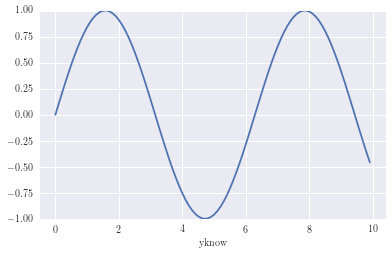

In [218]:
lf = LatexFigure(font_specifics = {"axes.labelsize": 10,})

x = np.arange(0, 10, 0.1)
ax = lf.new_axis()

ax.plot(x, np.sin(x))
ax.set_xlabel('yknow')
ax.set_ylim(-1, 1)

# lf.save(save_to_file = 'testfig.jpg', )